<center>

# Testing Generated Random Light Intensity Data

</center>

## Importing The Libraries

In [ ]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
from lib.trng import LightRandom

## Generating True Random Numbers

In [2]:
n_samples = 40

In [3]:
lrng = LightRandom()
data_rand = lrng.rand((n_samples))
data_randint = lrng.randint(low=-10, high=10, size=(n_samples))
data_randn = lrng.randn((n_samples))
DATA = pd.DataFrame(np.column_stack([data_rand, data_randint, data_randn]), columns=["rand", "randint", "randn"])

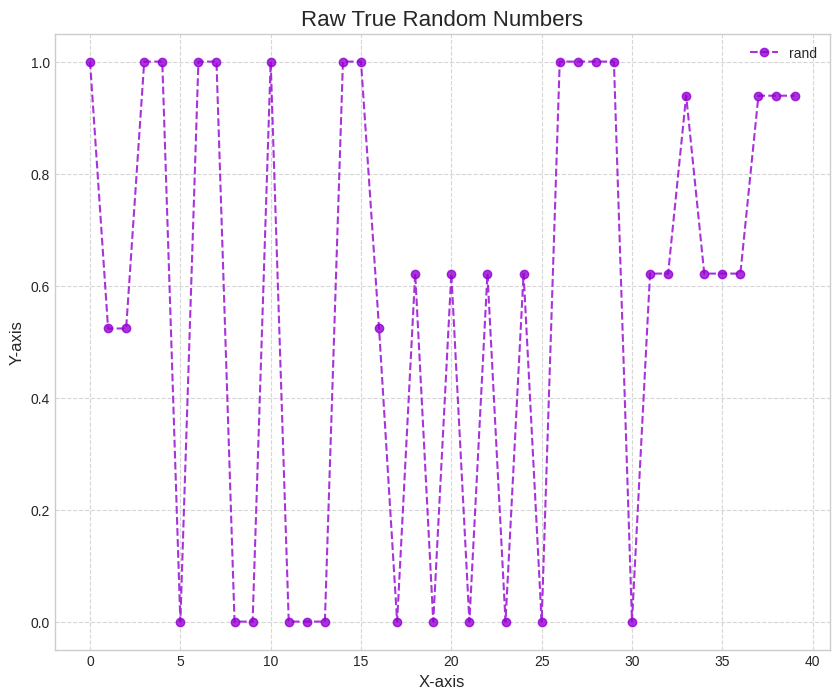

In [4]:
plt.style.use("seaborn-v0_8-whitegrid")
dpi=100
plt.figure(figsize=(10, 8), dpi=dpi)
plt.title("Raw True Random Numbers", fontsize=16)
plt.plot(np.array(range(len(data_rand))), data_rand, label="rand", marker="o", linestyle="--", color="darkviolet", alpha=0.8)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.grid(linestyle="--", alpha=0.8)
plt.legend()
plt.show()

In [ ]:
DATA.to_csv("collected_data/Generated True Random Numbers.csv", index=False)

In [ ]:
DATA_np = pd.DataFrame({
    'rand': np.random.rand(n_samples),
    'randint': np.random.randint(-10, 10, n_samples),
    'randn': np.random.randn(n_samples)
})
DATA_np.to_csv("collected_data/Generated Pseudo Random Numbers.csv", index=False)

## Visualising True Random Numbers

In [ ]:
DATA = pd.read_csv("collected_data/Generated True Random Numbers.csv")
DATA

,rand,randint,randn
0,1.000000,-10.0,0.058603
1,0.523366,-10.0,0.058603
2,0.523366,2.0,0.058603
3,1.000000,-10.0,4.753424
4,1.000000,9.0,0.058603
5,0.000000,2.0,4.753424
6,1.000000,-1.0,4.753424
7,1.000000,-1.0,4.753424
8,0.000000,2.0,4.753424
9,0.000000,-10.0,4.753424


In [8]:
DATA.describe()

,rand,randint,randn
count,40.000000,40.000000,40.000000
mean,0.572977,-1.425000,0.721900
std,0.414247,4.738752,3.753025
min,0.000000,-10.000000,-4.753424
25%,0.000000,-1.000000,-1.144404
50%,0.621412,-1.000000,0.309190
75%,1.000000,2.000000,4.753424
max,1.000000,9.000000,4.753424


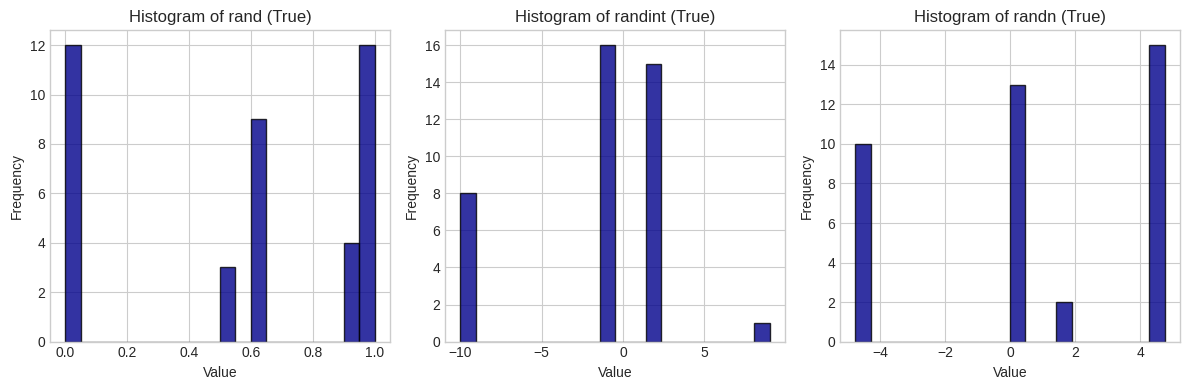

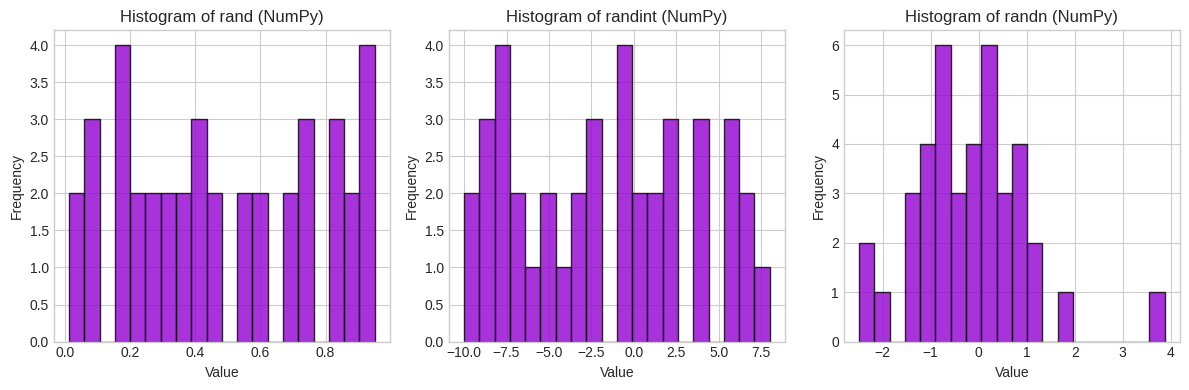

In [9]:
plt.style.use("seaborn-v0_8-whitegrid")
dpi=100
plt.figure(figsize=(12, 4), dpi=dpi)

for i, col in enumerate(DATA.columns):
    plt.subplot(1, 3, i+1)
    plt.hist(DATA[col], bins=20, alpha=0.8, color="darkblue", edgecolor='black')
    plt.title(f"Histogram of {col} (True)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4), dpi=dpi)

for i, col in enumerate(DATA_np.columns):
    plt.subplot(1, 3, i+1)
    plt.hist(DATA_np[col], bins=20, alpha=0.8, color="darkviolet", edgecolor='black')
    plt.title(f"Histogram of {col} (NumPy)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

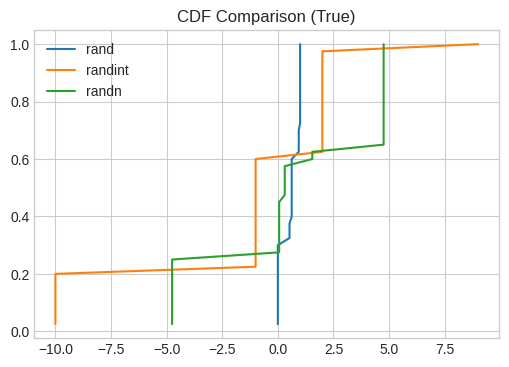

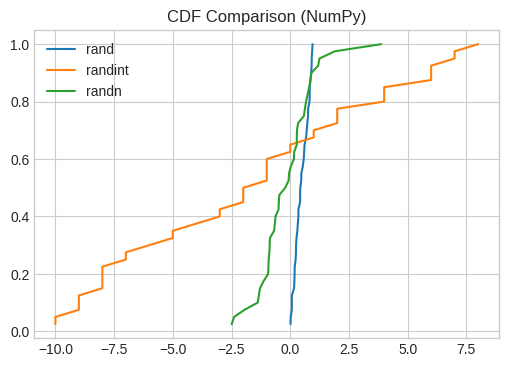

In [10]:
def plot_cdf(data, label):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)

plt.figure(figsize=(6,4), dpi=dpi)
for col in DATA.columns:
    plot_cdf(DATA[col], col)
plt.title("CDF Comparison (True)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4), dpi=dpi)
for col in DATA_np.columns:
    plot_cdf(DATA_np[col], col)
plt.title("CDF Comparison (NumPy)")
plt.legend()
plt.grid(True)
plt.show()


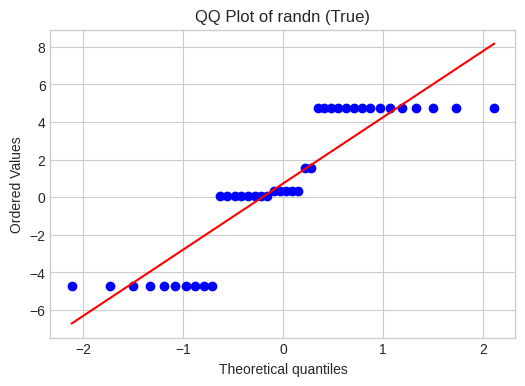

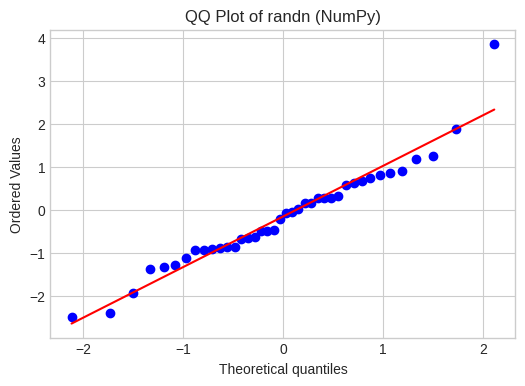

In [11]:
import scipy.stats as stats

plt.figure(figsize=(6,4), dpi=dpi)
stats.probplot(DATA['randn'], dist="norm", plot=plt)
plt.title("QQ Plot of randn (True)")
plt.show()

plt.figure(figsize=(6,4), dpi=dpi)
stats.probplot(DATA_np['randn'], dist="norm", plot=plt)
plt.title("QQ Plot of randn (NumPy)")
plt.show()


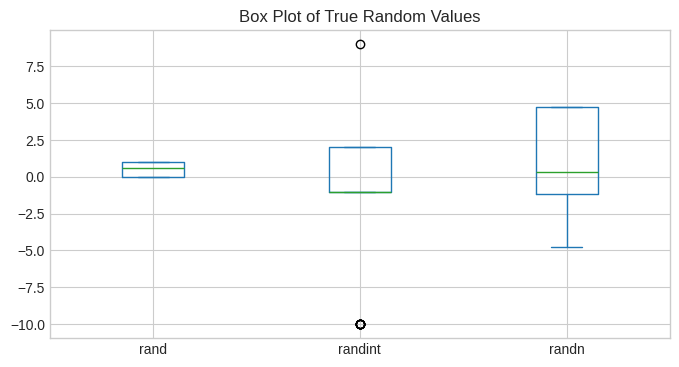

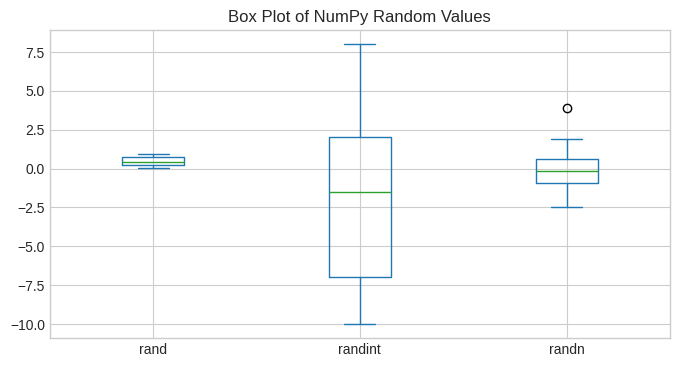

In [12]:
DATA.plot(kind='box', figsize=(8, 4), title="Box Plot of True Random Values")
plt.grid(True)
plt.show()

DATA_np.plot(kind='box', figsize=(8, 4), title="Box Plot of NumPy Random Values")
plt.grid(True)
plt.show()


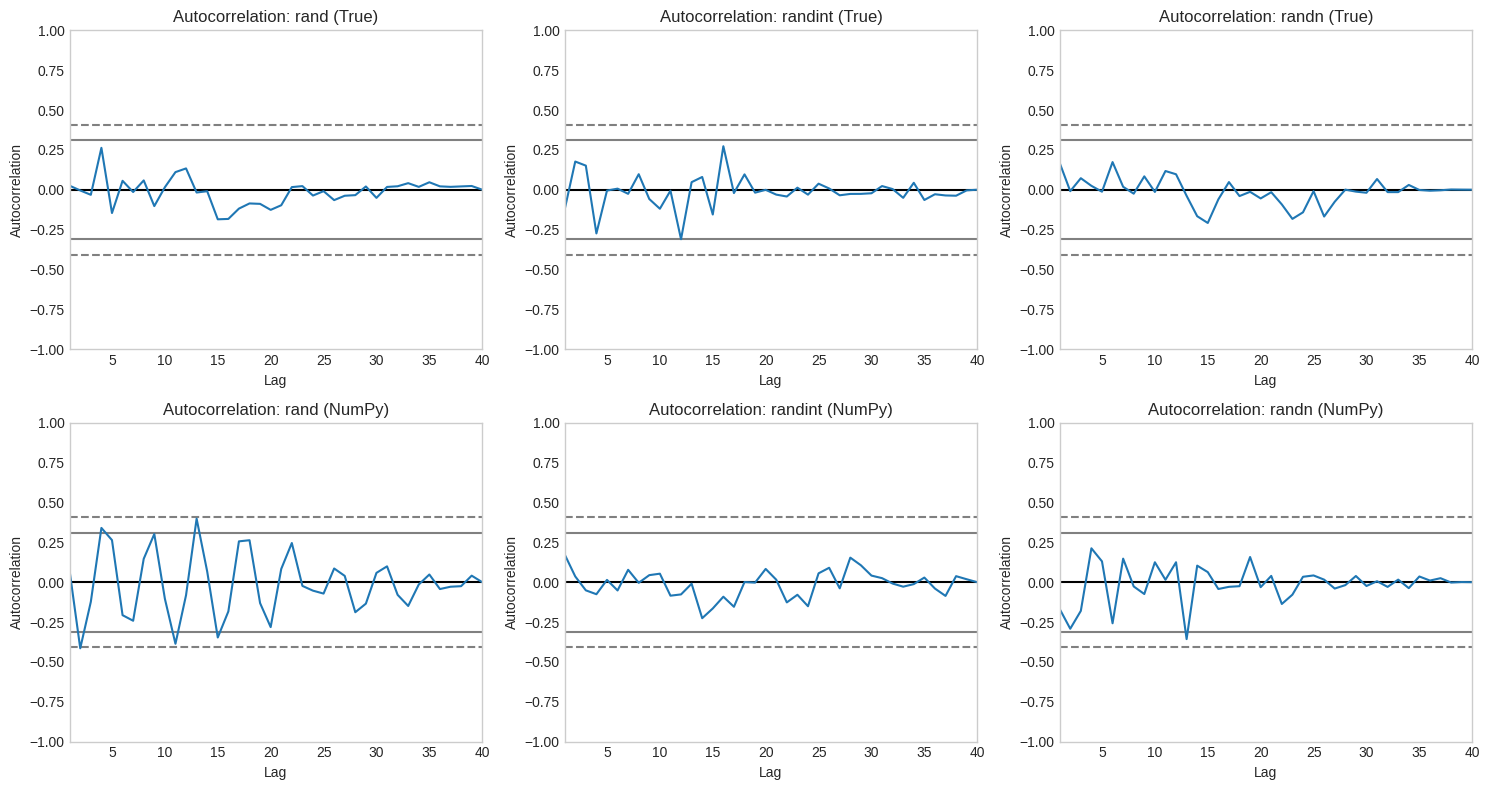

In [13]:
from pandas.plotting import autocorrelation_plot

cols = DATA.columns
n = len(cols)

fig, axs = plt.subplots(2, n, figsize=(5 * n, 8), dpi=dpi)

for i, col in enumerate(cols):
    plt.sca(axs[0, i])
    autocorrelation_plot(DATA[col])
    axs[0, i].set_title(f"Autocorrelation: {col} (True)")

    plt.sca(axs[1, i])
    autocorrelation_plot(DATA_np[col])
    axs[1, i].set_title(f"Autocorrelation: {col} (NumPy)")

plt.tight_layout()
plt.show()


In [14]:
from scipy.stats import entropy

def calc_entropy(series, bins=20):
    counts, _ = np.histogram(series, bins=bins)
    probs = counts / counts.sum()
    return entropy(probs)

for col in DATA.columns:
    print(f"True {col} Entropy:", calc_entropy(DATA[col]))

def calc_entropy(series, bins=20):
    counts, _ = np.histogram(series, bins=bins)
    probs = counts / counts.sum()
    return entropy(probs)

for col in DATA_np.columns:
    print(f"NumPy {col} Entropy:", calc_entropy(DATA_np[col]))


True rand Entropy: 1.4825345765783895
True randint Entropy: 1.1484368314687277
True randn Entropy: 1.2294484552490994
NumPy rand Entropy: 2.7354633050095525
NumPy randint Entropy: 2.7570394604434365
NumPy randn Entropy: 2.4189608220032337


In [15]:
from statsmodels.sandbox.stats.runs import runstest_1samp

for col in DATA.columns:
    z_stat, p_value = runstest_1samp(DATA[col])
    print(f"True{col} runs test: z = {z_stat:.2f}, p = {p_value:.4f}")

for col in DATA_np.columns:
    z_stat, p_value = runstest_1samp(DATA_np[col])
    print(f"NumPy {col} runs test: z = {z_stat:.2f}, p = {p_value:.4f}")


Truerand runs test: z = 0.26, p = 0.7974
Truerandint runs test: z = -0.66, p = 0.5089
Truerandn runs test: z = -0.34, p = 0.7306
NumPy rand runs test: z = -1.07, p = 0.2855
NumPy randint runs test: z = -1.12, p = 0.2622
NumPy randn runs test: z = 0.16, p = 0.8727
